<a href="https://colab.research.google.com/github/00BondViz/Using-Deep-Learning-to-Extract-Text-and-convert-to-CSV/blob/main/Extracting_Tables_From_Images_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#We are using this library/package for text extraction from our sample text images
!pip install -U layoutparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 68.7 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=006213c2ad5990bf2f44bda8c2de5f3d0b88d9dde45dfc3c8a8edfe6a61555b0
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built iopath


In [15]:
#For layoutparser to work it needs the detectron2 framework to run in the backend
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-phgu0y40/detectron2_59970d2b69884be5a18ea1f2931c0b01
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-phgu0y40/detectron2_59970d2b69884be5a18ea1f2931c0b01
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.4-cp310-cp310-linux_x86_64.whl size=5641897 sha256=1f9c2b726318d

In [16]:
# WE pip insatll Layoutparser ocr for ocr entities to get installed so that layout parserr can work with them
!pip install layoutparser[ocr]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.1
    Uninstalling google-api-core-2.11.1:
      Successfully uninstalled google-api-core-2.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.0 which is incompatible.


In [17]:

!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1357, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 1357 (delta 341), reused 272 (delta 264), pack-reused 957
Receiving objects: 100% (1357/1357), 62.86 MiB | 23.83 MiB/s, done.
Resolving deltas: 100% (739/739), done.


In [18]:

%cd layout-parser/

/content/layout-parser


In [19]:
#We need to import OpenCv2 to help with converting the images to RGB format.
import cv2
image = cv2.imread("/content/layout-parser/examples/data/image-0079.png")
image = image[..., ::-1]

config.yaml?dl=1: 8.19kB [00:02, 3.18kB/s]
model_final.pth?dl=1: 482MB [00:14, 33.4MB/s]                           


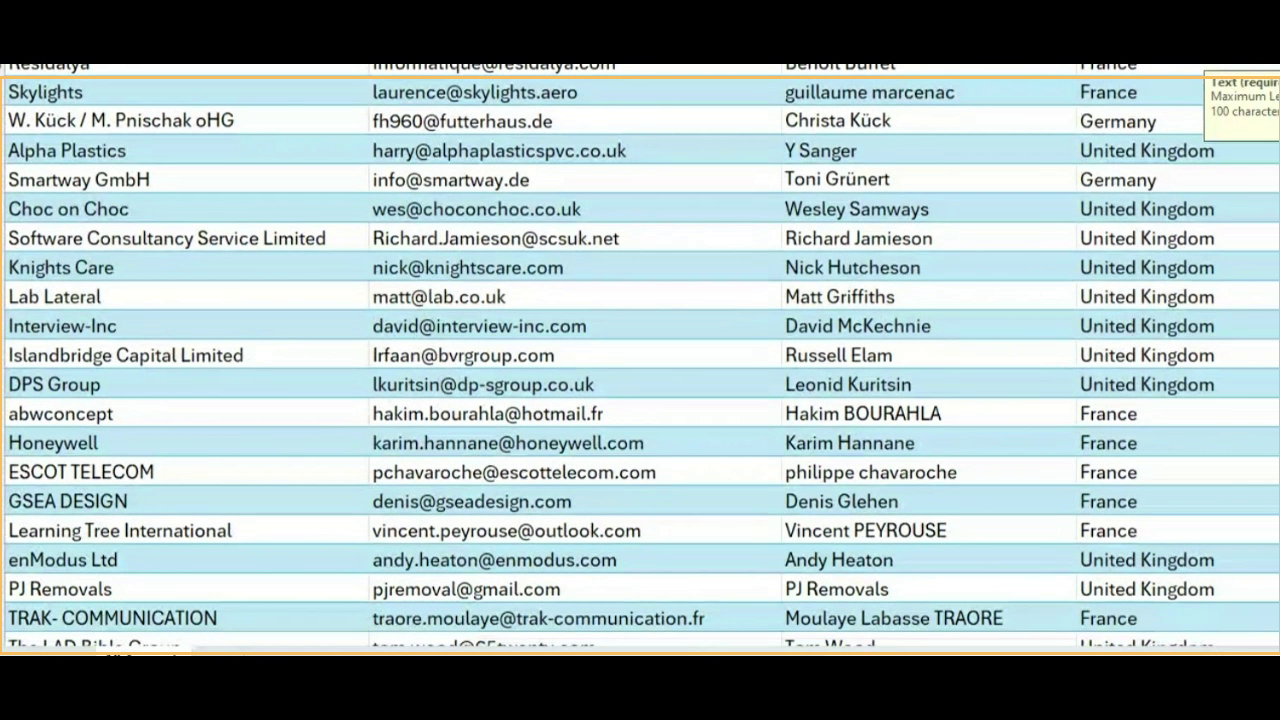

In [20]:
# "After converting the format, wew need to use Delectron2 funtion and we spesicially use the 'TableBank' model. This is because it suites our use case
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://TableBank/faster_rcnn_R_101_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Table"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)

In [21]:
# The peice of code below tells us the region where our table is located, with use of cordinates. As well as mentioning tha accracy of the table identification (Score= 0.935)
text_blocks = lp.Layout([b for b in layout if b.type=="Table"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=0.0, y_1=77.965576171875, x_2=1280.0, y_2=653.0953979492188), text=None, id=None, type=Table, parent=None, next=None, score=0.9709367156028748)], page_data={})

In [22]:
#By printing out layout, we are the given the co-ordiantes of the table within the image.
# The coodinats given are of the image height and width of the image
#With these cordinates being availed we can then locate the table from the image
layout

Layout(_blocks=[TextBlock(block=Rectangle(x_1=0.0, y_1=77.965576171875, x_2=1280.0, y_2=653.0953979492188), text=None, id=None, type=Table, parent=None, next=None, score=0.9709367156028748)], page_data={})

In [23]:
#This next part of the code speaks to us now wanting to identify the table in the image.
# We insert the cordinates of the image below

x_1=0.0
y_1=77.965576171875
x_2=1280.0
y_2=653.0953979492188

for l in layout:
  #print(l)
  if l.type == 'Table':
    x_1 = int(l.block.x_1)
    print(l.block.x_1)
    y_1 = int(l.block.y_1)
    x_2 = int(l.block.x_2)
    y_2 = int(l.block.y_2)

    break

0.0


In [24]:
print(x_1,y_1,x_2,y_2)

0 77 1280 653


In [25]:
# then we need to read the image using CV
im = cv2.imread('/content/layout-parser/examples/data/image-0079.png')

In [26]:
#After reading the image we crop out our area of interest , which is where the text is
#we save the croped area as 'ext_im.jpg'
cv2.imwrite('Ext_im.jpg', im[y_1:y_2,x_1:x_2])

True

In [8]:
#to solve the problem of not having paddle ocr we need to first install the following
!python3 -m pip install paddlepaddle-gpu
!pip install "paddleocr>=2.0.1"
!pip install protobuf==3.20.0
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

  Using cached protobuf-4.25.1-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.15.1 requires protobuf<4.24,>=3.19.6, but you have protobuf 4.25.1 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.25.1 which is incompatible.
  Using cached protobuf-3.20.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.1
    Uninstalling protobuf-4.25.1:
      Successfully uninstalled protobuf-4.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Th

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [29]:
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

In [34]:
#_____________________________________________---------------------------------------------------_____________________________________________#
#we then move onto the text detection from our images
#Being able to use this was solved with the assignment of GPU to false
from paddleocr import PaddleOCR, draw_ocr

In [38]:
#in order for me to be able to read Paddle i need to asign gpu to False
#Make sure the extracted image path is well represented
ocr = PaddleOCR(lang='en' , use_gpu= False)
image_path = '/content/layout-parser/Ext_im.jpg'
image_cv = cv2.imread(image_path)
image_height = image_cv.shape[0]
image_width = image_cv.shape[1]
output = ocr.ocr(image_path)[0]

##in order for me to be able to read Paddle i need to asign gpu to False
#ocr = PaddleOCR(lang='en' , use_gpu= False)
#image_path = '/content/Ext_im.jpg'
#if not os.path.exists(image_path):
#  print('Image does not exist.')
#  exit()
#image_cv = cv2.imread(image_path)
#image_height = image_cv.shape[0]
#image_width = image_cv.shape[1]
#output = ocr.ocr(image_path)[0]



[2023/12/29 14:30:11] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [39]:
#The output will give us the different locations of text with the boxes respective to the word being highlighted
print(output)

[[[[5.0, 4.0], [84.0, 4.0], [84.0, 27.0], [5.0, 27.0]], ('Skylights', 0.9964813590049744)], [[[373.0, 6.0], [577.0, 6.0], [577.0, 24.0], [373.0, 24.0]], ('laurence@skylights.aero', 0.9961950778961182)], [[[783.0, 5.0], [957.0, 5.0], [957.0, 27.0], [783.0, 27.0]], ('guillaume marcenac', 0.9581579566001892)], [[[1077.0, 1.0], [1142.0, 4.0], [1140.0, 29.0], [1076.0, 25.0]], ('France', 0.9976761937141418)], [[[1207.0, 9.0], [1278.0, 12.0], [1277.0, 31.0], [1206.0, 28.0]], ('Maximum L', 0.9467018842697144)], [[[1209.0, 1.0], [1276.0, 1.0], [1276.0, 14.0], [1209.0, 14.0]], ('Text (requi', 0.9412652850151062)], [[[5.0, 32.0], [235.0, 32.0], [235.0, 54.0], [5.0, 54.0]], ('W.Kuck/M.Pnischak oHG', 0.9741300940513611)], [[[369.0, 33.0], [553.0, 33.0], [553.0, 55.0], [369.0, 55.0]], ('fh960@futterhaus.de', 0.9921530485153198)], [[[784.0, 32.0], [892.0, 32.0], [892.0, 55.0], [784.0, 55.0]], ('Christa Kuck', 0.9803853034973145)], [[[1075.0, 29.0], [1160.0, 32.0], [1159.0, 59.0], [1074.0, 56.0]], ('G

In [40]:
boxes = [line[0] for line in output]
texts = [line[1][0] for line in output]
probabilities = [line[1][1] for line in output]

In [41]:
image_boxes = image_cv.copy()

In [42]:
for box,text in zip(boxes,texts):
  cv2.rectangle(image_boxes, (int(box[0][0]),int(box[0][1])), (int(box[2][0]),int(box[2][1])),(0,0,255),1)
  cv2.putText(image_boxes, text,(int(box[0][0]),int(box[0][1])),cv2.FONT_HERSHEY_SIMPLEX,1,(222,0,0),1)

In [43]:
cv2.imwrite('Detections.jpg', image_boxes)

True

In [44]:
# After identifying the text of which we want to extract we then need to use U
im = image_cv.copy()

In [45]:
horiz_boxes = []
vert_boxes = []

for box in boxes:
  x_h, x_v = 0,int(box[0][0])
  y_h, y_v = int(box[0][1]),0
  width_h,width_v = image_width, int(box[2][0]-box[0][0])
  height_h,height_v = int(box[2][1]-box[0][1]),image_height

  horiz_boxes.append([x_h,y_h,x_h+width_h,y_h+height_h])
  vert_boxes.append([x_v,y_v,x_v+width_v,y_v+height_v])

  cv2.rectangle(im,(x_h,y_h), (x_h+width_h,y_h+height_h),(0,0,255),1)
  cv2.rectangle(im,(x_v,y_v), (x_v+width_v,y_v+height_v),(0,255,0),1)

In [46]:
cv2.imwrite('Horiz_vert.jpg',im)

True

In [47]:
horiz_out = tf.image.non_max_suppression(
    horiz_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [48]:
horiz_lines = np.sort(np.array(horiz_out))
print(horiz_lines)

[ 3  9 13 18 20 24 27 32 36 40 45 50 51 56 60 64 68 72 78 80]


In [49]:
im_nms = image_cv.copy()

In [50]:
for val in horiz_lines:
  cv2.rectangle(im_nms, (int(horiz_boxes[val][0]),int(horiz_boxes[val][1])), (int(horiz_boxes[val][2]),int(horiz_boxes[val][3])),(0,0,255),1)

In [51]:
cv2.imwrite('Im_nms.jpg',im_nms)

True

In [53]:
vert_out = tf.image.non_max_suppression(
    vert_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [54]:
print(vert_out)

tf.Tensor([64 51  3 13 10], shape=(5,), dtype=int32)


In [55]:
vert_lines = np.sort(np.array(vert_out))
print(vert_lines)

[ 3 10 13 51 64]


In [56]:
for val in vert_lines:
  cv2.rectangle(im_nms, (int(vert_boxes[val][0]),int(vert_boxes[val][1])), (int(vert_boxes[val][2]),int(vert_boxes[val][3])),(255,0,0),1)

In [58]:
cv2.imwrite('Im_nms.jpg',im_nms)

True

In [59]:
#Converting our findings to CSV
out_array = [["" for i in range(len(vert_lines))] for j in range(len(horiz_lines))]
print(np.array(out_array).shape)
print(out_array)

(20, 5)
[['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', '']]


In [60]:

unordered_boxes = []

for i in vert_lines:
  print(vert_boxes[i])
  unordered_boxes.append(vert_boxes[i][0])

[1077, 0, 1140, 576]
[1210, 0, 1277, 576]
[781, 0, 859, 576]
[5, 0, 100, 576]
[369, 0, 643, 576]


In [61]:
ordered_boxes = np.argsort(unordered_boxes)
print(ordered_boxes)

[3 4 2 0 1]


In [62]:
def intersection(box_1, box_2):
  return [box_2[0], box_1[1],box_2[2], box_1[3]]

In [63]:
def iou(box_1, box_2):

  x_1 = max(box_1[0], box_2[0])
  y_1 = max(box_1[1], box_2[1])
  x_2 = min(box_1[2], box_2[2])
  y_2 = min(box_1[3], box_2[3])

  inter = abs(max((x_2 - x_1, 0)) * max((y_2 - y_1), 0))
  if inter == 0:
      return 0

  box_1_area = abs((box_1[2] - box_1[0]) * (box_1[3] - box_1[1]))
  box_2_area = abs((box_2[2] - box_2[0]) * (box_2[3] - box_2[1]))

  return inter / float(box_1_area + box_2_area - inter)

In [64]:
for i in range(len(horiz_lines)):
  for j in range(len(vert_lines)):
    resultant = intersection(horiz_boxes[horiz_lines[i]], vert_boxes[vert_lines[ordered_boxes[j]]] )

    for b in range(len(boxes)):
      the_box = [boxes[b][0][0],boxes[b][0][1],boxes[b][2][0],boxes[b][2][1]]
      if(iou(resultant,the_box)>0.1):
        out_array[i][j] = texts[b]

In [65]:
out_array=np.array(out_array)

In [66]:
out_array

array([['Skylights', 'laurence@skylights.aero', 'guillaume marcenac',
        'France', '100 characte'],
       ['W.Kuck/M.Pnischak oHG', 'fh960@futterhaus.de', 'Christa Kuck',
        'Germany', '100 characte'],
       ['Alpha Plastics', 'harry@alphaplasticspvc.co.uk', 'YSanger',
        'United Kingdom', ''],
       ['Smartway GmbH', 'info@smartway.de', 'Toni Grunert', 'Germany',
        ''],
       ['Choc on Choc', 'wes@choconchoc.co.uk', 'Wesley Samways',
        'United Kingdom', ''],
       ['Software Consultancy Service Limited',
        'Richard.Jamieson@scsuk.net', 'Richard Jamieson',
        'United Kingdom', ''],
       ['Knights Care', 'nick@knightscare.com', 'Nick Hutcheson',
        'United Kingdom', ''],
       ['Lab Lateral', 'matt@lab.co.uk', 'Matt Griffiths',
        'United Kingdom', ''],
       ['Interview-Inc', 'david@interview-inc.com', 'David McKechnie',
        'United Kingdom', ''],
       ['Islandbridge Capital Limited', 'Irfaan@bvrgroup.com',
        'Russell

In [67]:
pd.DataFrame(out_array).to_csv('sample0079.csv')